# PROJEKTNA NALOGA IZ ANALIZE PODATKOV IGRE LEAGUE OF LEGENDS

## UVOD

[League of Legends](https://www.leagueoflegends.com/en-gb/) je priljubljena videoigra podjetja Riot Games, ki je izšla že leta 2009. Od takrat je močno zrasla v popularnosti, danes jo namreč igra okoli 150 milijonov igralcev. Podatke za analizo te igre sem vzel iz spletne strani [u.gg](https://u.gg/).

Osnovni način igre, ki sem ga izbral za analizo podatkov, se imenuje *Summoner's Rift*. V tem načinu se spopadeta dve ekipi, vsaka po 5 igralcev. Vsak igralec mora izmed 168 likov (*champion-ov*) izbrati svojega. Vsak igralec ekipe dobi tudi svojo [vlogo](https://www.pinnacle.com/en/esports-hub/betting-articles/league-of-legends/the-different-league-of-legends-roles-explained/atz2jajnpca9ppgg) (*role*), to so: top, jungle, mid, bot in support. Ekipa mora s pomočjo vseh igralcev in strategije uničiti nasprotnikovo bazo, da zmaga igro. Igralci so rangirani v 15 nivojev glede na to, kako dobro igrajo. Kjer ni posebej specificirano sem analiziral podatke iz vseh nivojev skupaj.

## ANALIZA PODATKOV

Za analizo podatkov bomo potrebovali nekaj knjižnic, ki jih najprej uvozimo. Prav tako si v datoteki s pomožnimi funkcijami pripravimo nekaj funkcij in spremenljivk, ki nam bodo v pomoč pri analizi.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pomozne_funkcije import *

### SPLOŠNI PODATKI

Za uživalca te priljubljene igre je najbolj zanimiv podatek, kateri championi najpogosteje zmagujejo (*win rate*), da se lahko odločijo koga igrati.

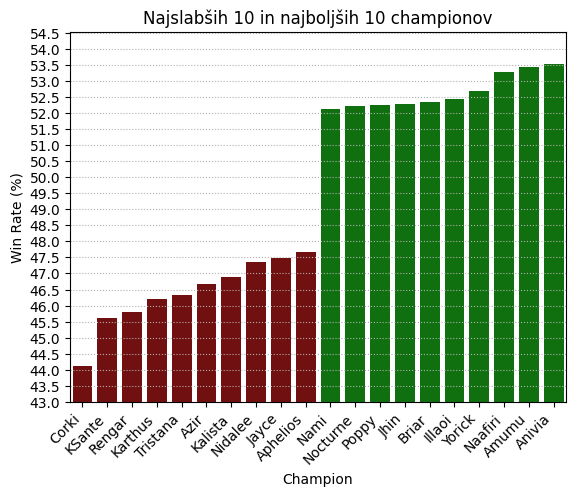

In [2]:
izbrani_wr = izbrani_champs(10, 'Win Rate (%)')
sns.barplot(x='Champion', y='Win Rate (%)', hue = 'Champion', data=izbrani_wr, palette=['maroon']*10 + ['green']*10, legend = False)
plt.xticks(rotation=45, ha='right')
plt.ylim(int(izbrani_wr['Win Rate (%)'].min()) - 1, izbrani_wr['Win Rate (%)'].max() + 1)
plt.yticks(np.arange(int(izbrani_wr['Win Rate (%)'].min()) - 1, izbrani_wr['Win Rate (%)'].max() + 1, 0.5))
plt.grid(True, axis='y', linestyle='dotted')
plt.title('Najslabših 10 in najboljših 10 championov')
plt.show()

Ob izbiri igranja nas zanima tudi, če bomo tega championa sploh lahko igrali. Poglejmo si, kateri championi so najpogosteje prepovedani (*ban rate*) in kateri so najpogosteje izbrani (*pick rate*). Te bomo verjetno lahko igrali bolj redko, saj jih bo že izbral kdo drug ali pa bodo prepovedani.

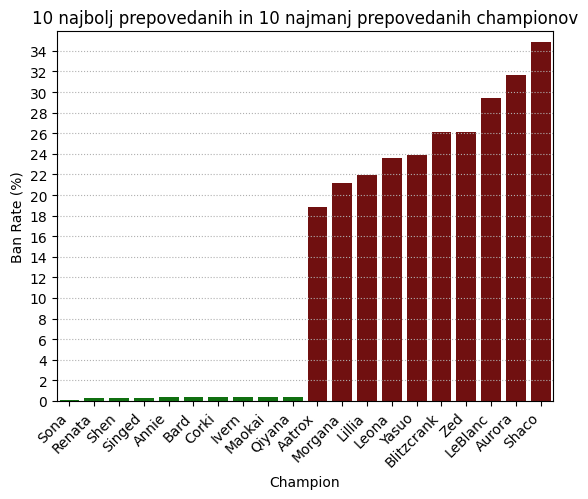

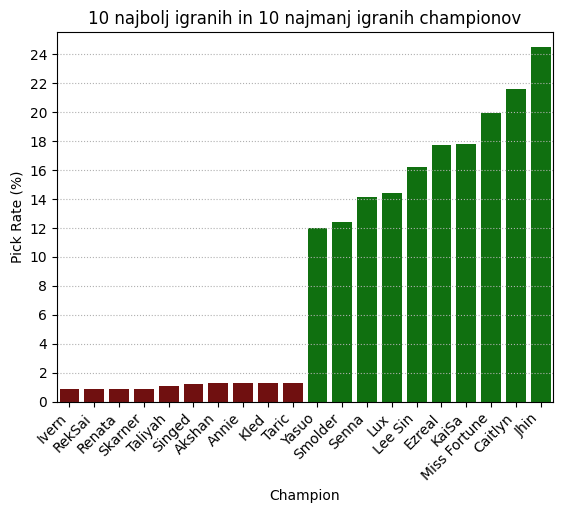

In [3]:
izbrani_br = izbrani_champs(10, 'Ban Rate (%)')
sns.barplot(x='Champion', y='Ban Rate (%)', hue = 'Champion', data=izbrani_br, palette=['green']*10 + ['maroon']*10, legend = False)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, izbrani_br['Ban Rate (%)'].max() + 1)
plt.yticks(np.arange(0, izbrani_br['Ban Rate (%)'].max() + 1, 2))
plt.grid(True, axis='y', linestyle='dotted')
plt.title('10 najbolj prepovedanih in 10 najmanj prepovedanih championov')
plt.show()

izbrani_pr = izbrani_champs(10, 'Pick Rate (%)')
sns.barplot(x='Champion', y='Pick Rate (%)', hue = 'Champion', data=izbrani_pr, palette=['maroon']*10 + ['green']*10, legend = False)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, izbrani_pr['Pick Rate (%)'].max() + 1)
plt.yticks(np.arange(0, izbrani_pr['Pick Rate (%)'].max() + 1, 2))
plt.grid(True, axis='y', linestyle='dotted')
plt.title('10 najbolj igranih in 10 najmanj igranih championov')
plt.show()

Opazimo, da je Aurora bolj pogosto prepovedan champion. Ta podatek nam je logičen, sa je izšla 17. julija 2024 in ljudje še ne znajo igrati proti njej. Poleg nje ljudje očitno močno ne marajo tudi Shacota, ki je znan kot nadležen. Na seznamu bolj prepovedanih pa sta tudi Lillia in Leona, ki sta zelo močna championa. S poznavanjem igre je jasno, da je količina prepovedi odvisna od tega kako nadležen je champion in kako močan je. 

Glede količine igranja championov opazimo, da jih veliko pripada vlogi *bottom*. Kasneje si bomo še bolj natančno ogledali, če sta ta dva podatka v korelaciji, za sedaj pa se zadovoljimo zgolj s temi podatki, ki igralcu potešijo radovednost.

### ODVISNOSTI RAZLIČNIH PODATKOV

Že pri prejšnjih grafih smo začeli opazovati, kateri podatki so odvisni en od drugega. Sedaj si te odvisnosti poglejmo še bolj natančno.

Najprej si oglejmo, če je to, kako pogosto je champion izbran odvisno od tega kako pogosto zmaga. 

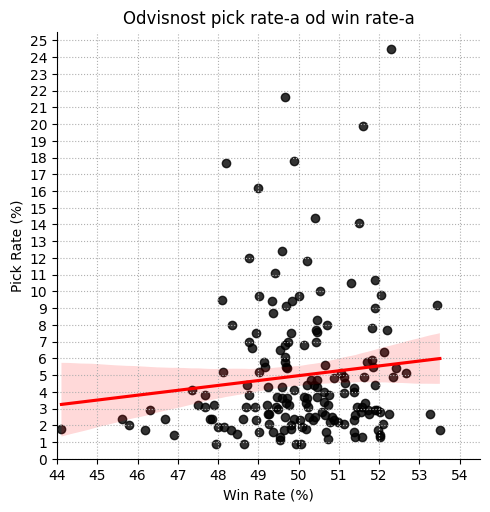

In [4]:
vsi_championi = pd.read_csv(f'../podatki/csv/overall.csv')
sns.lmplot(x='Win Rate (%)', y='Pick Rate (%)', data=vsi_championi, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlim(int(vsi_championi['Win Rate (%)'].min()), vsi_championi['Win Rate (%)'].max() + 1)
plt.xticks(np.arange(int(vsi_championi['Win Rate (%)'].min()), vsi_championi['Win Rate (%)'].max() + 1, 1))
plt.ylim(0, izbrani_pr['Pick Rate (%)'].max() + 1)
plt.yticks(np.arange(0, izbrani_pr['Pick Rate (%)'].max() + 1, 1))
plt.grid(True, linestyle='dotted')
plt.title('Odvisnost pick rate-a od win rate-a')
plt.show()

Opazimo majhno korelacijo. Očitno ima možnost championa da zmaga manjši vpliv na to, kako pogosto je izbran, a so v igri še drugi dejavniki. Na to, kako pogosto champion zmaga morda vpliva tudi količina prepovedi, ki nam pove tudi kako močan je champion v očeh igralcev.  

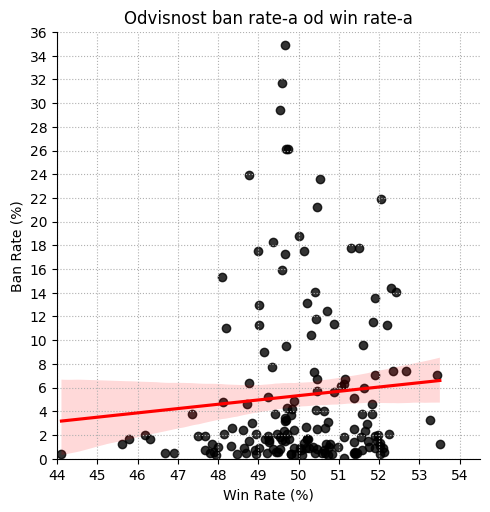

In [5]:
sns.lmplot(x='Win Rate (%)', y='Ban Rate (%)', data=vsi_championi, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlim(int(vsi_championi['Win Rate (%)'].min()), vsi_championi['Win Rate (%)'].max() + 1)
plt.xticks(np.arange(int(vsi_championi['Win Rate (%)'].min()), vsi_championi['Win Rate (%)'].max() + 1, 1))
plt.ylim(0, izbrani_pr['Ban Rate (%)'].max() + 2)
plt.yticks(np.arange(0, vsi_championi['Ban Rate (%)'].max() + 2, 2))
plt.grid(True, linestyle='dotted')
plt.title('Odvisnost ban rate-a od win rate-a')
plt.show()

Očitno korelacija obstaja. Bolj močno pa je razvidno, da so najpogosteje prepovedani championi z win rate-om večjim od 49 %. Kaj pa, če je pogosteje prepovedan champion, ki je pogosto izbran? Poglejmo si še to odvisnost.

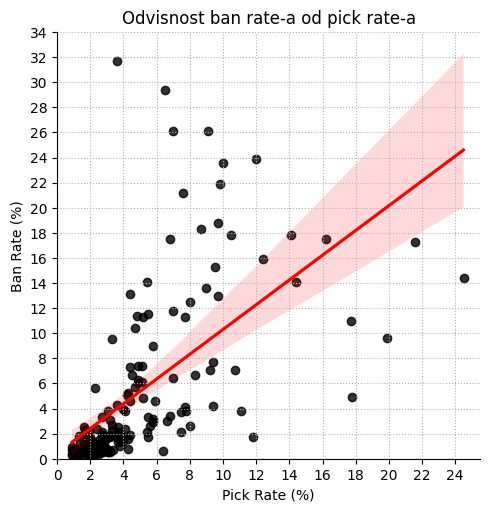

In [6]:
sns.lmplot(x='Pick Rate (%)', y='Ban Rate (%)', data=vsi_championi, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlim(int(vsi_championi['Pick Rate (%)'].min()), vsi_championi['Pick Rate (%)'].max() + 1)
plt.xticks(np.arange(int(vsi_championi['Pick Rate (%)'].min()), vsi_championi['Pick Rate (%)'].max() + 1, 2))
plt.ylim(0, izbrani_pr['Ban Rate (%)'].max() + 1)
plt.yticks(np.arange(0, vsi_championi['Ban Rate (%)'].max() + 1, 2))
plt.grid(True, linestyle='dotted')
plt.title('Odvisnost ban rate-a od pick rate-a')
plt.show()

Naklon korelacijske premice je tu kar velik, torej je očitno ban rate močno odvisen od pick rate-a. Verjetno se igralci naveličajo igrati proti istim championom, ali pa prepovedo tistega, ki jih je ravno premagal prejšnjo igro in odvisnost pride iz tega.

### ANALIZA VLOG

Championov v igri je kar 168, niso pa enakomerno porazdeljenih po različnih role-ih. Oglejmo si, championov katerega role-a je največ. 

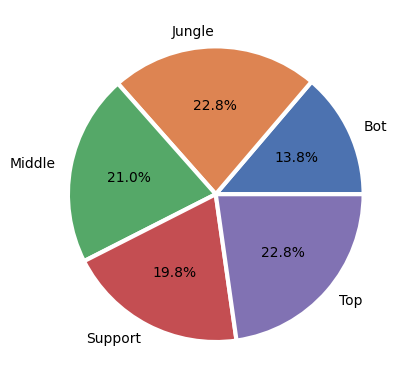

In [7]:
podatki_role = vsi_championi.groupby('Role').size()
plt.pie(podatki_role, labels = podatki_role.index, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, colors = sns.color_palette('deep'))
plt.show()


Vidimo, da so razlike med različnimi role-i kar opazne, championov s topa-a je kar 9% več kot iz spodnje strani rifta! Očitno ima podjetje Riot Games preferenco za top, res pa ne mara celotne spodnje strani rifta (support in bot sta namreč oba na spodnjem delu). Poglejmo si še kakšno je mnenje igralcev - ali je kakšen role veliko bolj prepovedan kot drugi. Za izbrane podatke bomo vzeli le champione, katerih ban rate je večji od 2%, da izključimo veliko količino tistih s premajhnim ban rate-om.

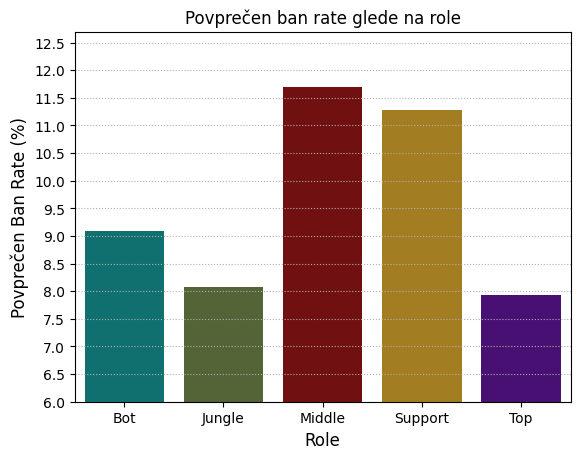

In [8]:
dobri_podatki = vsi_championi[vsi_championi['Ban Rate (%)'] > 2]
podatki_roleb = dobri_podatki.groupby('Role')['Ban Rate (%)'].mean().reset_index()

sns.barplot(x='Role', y='Ban Rate (%)', hue = 'Role', data=podatki_roleb, palette=['teal', 'darkolivegreen', 'maroon', 'darkgoldenrod', 'indigo'])
plt.title('Povprečen ban rate glede na role')
plt.xlabel('Role', size = 12)
plt.ylabel('Povprečen Ban Rate (%)', size = 12)
plt.ylim(podatki_roleb['Ban Rate (%)'].min() - 1, podatki_roleb['Ban Rate (%)'].max() + 1)
plt.yticks(np.arange(int(podatki_roleb['Ban Rate (%)'].min()) - 1, podatki_roleb['Ban Rate (%)'].max() + 1, 0.5))
plt.grid(True, axis = 'y', linestyle = 'dotted')
plt.show()

Opazimo, da je support najbolj prepovedan, top in jungle pa najmanj. Sklepamo lahko, da do tega pride, ker imajo support in middle največ vpliva na celoten rift in jih posledično prepovedo tudi igralci iz drugih role-ov (za top velja nasprotno). Precej presenetljiv je podatek za jungle, saj je prav tako prisoten povsod, a očitno ni tako nadležen, da bi ga ostali prepovedali.

Poglejmo si še, če imajo igralci s različnim znanjem drugačno preferenco, kateri role prepovedati.

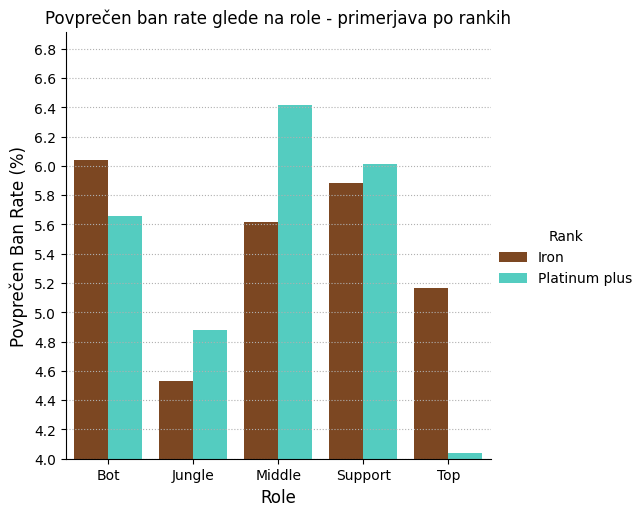

In [9]:
vsi_championi_platplus = pd.read_csv('../podatki/csv/platinum_plus.csv')
vsi_championi_iron = pd.read_csv('../podatki/csv/iron.csv')
vsi_championi_platplus_groupedrole = pd.read_csv('../podatki/csv/platinum_plus.csv').groupby('Role')['Ban Rate (%)'].mean().reset_index()
vsi_championi_iron_groupedrole  = pd.read_csv('../podatki/csv/iron.csv').groupby('Role')['Ban Rate (%)'].mean().reset_index()
vsi_championi_platplus_groupedrole ['Rank'] = 'Platinum plus'
vsi_championi_iron_groupedrole ['Rank'] = 'Iron'
primerjava_platplus_iron = pd.concat([vsi_championi_iron_groupedrole , vsi_championi_platplus_groupedrole])
sns.catplot(x='Role', y='Ban Rate (%)', hue='Rank', data=primerjava_platplus_iron, palette=['saddlebrown', 'turquoise'], kind='bar')
plt.title('Povprečen ban rate glede na role - primerjava po rankih')
plt.xlabel('Role', size = 12)
plt.ylabel('Povprečen Ban Rate (%)', size = 12)
plt.ylim(primerjava_platplus_iron['Ban Rate (%)'].min(), primerjava_platplus_iron['Ban Rate (%)'].max() + 0.5)
plt.yticks(np.arange(int(primerjava_platplus_iron['Ban Rate (%)'].min()), primerjava_platplus_iron['Ban Rate (%)'].max() + 0.5, 0.2))
plt.grid(True, axis = 'y', linestyle = 'dotted')
plt.show()

Največjo razliko v prepovedih opazimo pri top in middle. Platinum plus igralci (najboljši rank) prioritizirajo prepovedi championov, ki imajo na igro velik vpliv s svojo prisotnostjo, zato večkrat prepovedo tudi jungle, iron igralci pa se osredotočajo na champione, ki imajo velik vpliv na igro zaradi svoje moči in ne prisotnosti (bot in top sta namreč lahko zelo močna, če sta nekontrolirana, nista pa tako prisotna povsod).

### BOLJ ZANIMIVA META-ANALIZA

Zanimivo bi bilo ugotoviti, kako igralci pristopajo k izbiri prepovedi in koga bodo igrali. Ali vedno vsi prepovedo nekoga? Ali se champione igra zgolj v njihovi primarni vlogi?

In [10]:
sestet_br = vsi_championi['Ban Rate (%)'].sum()
print(f'Če seštejemo ban rate vseh championov dobimo vrednost {round(sestet_br, 1)}% oz. {round(sestet_br/100, 3)}.')
print(f'Delež igralcev, ki priložnosti za prepoved ne uporabijo je {round((1000 - sestet_br) / 10, 1)}%.')
sestet_pr = vsi_championi['Pick Rate (%)'].sum()
print(f'Če seštejemo pick rate vseh championov dobimo vrednost {round(sestet_pr, 1)}% oz. {round(sestet_pr/100, 3)}.')
print(f'Delež igralcev, ki championa ne igrajo v njegovem primarnem role-u je {round((1000 - sestet_pr) / 10, 1)}%.')

Če seštejemo ban rate vseh championov dobimo vrednost 892.2% oz. 8.922.
Delež igralcev, ki priložnosti za prepoved ne uporabijo je 10.8%.
Če seštejemo pick rate vseh championov dobimo vrednost 831.5% oz. 8.315.
Delež igralcev, ki championa ne igrajo v njegovem primarnem role-u je 16.8%.


Zanimivo je, da se pick rate in ban rate ne seštejeta v 10, čeprav je izbiranj v igri 10 ( $2 \times 5$ igralcev). Razlogov, zakaj do tega pride je lahko več. Prvi je, da so med podatki prisotni samo odstotki za championi v njegovem primarnem role-u, torej, če se nekdo odloči določenega top championa igrati v jungle, to  ne bo šteto v pick rate. Za ban rate pa vpliva tudi to, da ne izkoristijo vedno vsi igralci priložnosti, da nekega championa prepovedo, torej ni porabljenih vseh 10 možnosti. Vidimo, da je delež ljudi, ki championa igrajo v role-u, ki mu ni primaren sicer večji od tistih, ki priložnosti za ban ne porabijo. Ta podatek je zelo zanimiv!

Ali mogoče na (ne)zmožnost igralcev v nižjih rankih, da zmagajo vpliva to, da ne izbirajo championov v njihovih primarnih vlogah? Poglejmo si, če to drži.

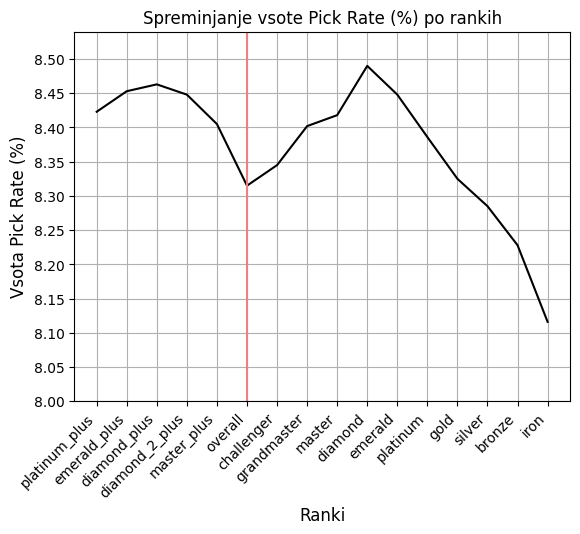

(Z rdečo črto je označeno povprečje po vseh rankih.)


In [11]:
pick_rates = pridobi_pick_rates_sum()
font1 = {'size': 12} 
plt.plot(seznam_rankov, pick_rates, color = 'black')
plt.title('Spreminjanje vsote Pick Rate (%) po rankih')
plt.xlabel('Ranki', fontdict= font1)
plt.ylabel('Vsota Pick Rate (%)', fontdict=font1)
plt.xticks(rotation=45, ha='right')
plt.ylim(int(min(pick_rates)), max(pick_rates)+ 0.05)
plt.yticks(np.arange(int(min(pick_rates)), max(pick_rates)+ 0.05, 0.05))
plt.grid(True)
plt.axvline(x='overall', color = 'lightcoral')
plt.show()
print('(Z rdečo črto je označeno povprečje po vseh rankih.)')

Zelo jasno vidimo, da v nižjih rankih igralci manj pogosto izbirajo champione v njihovih primarnih vlogah. Ko napredujemo po rankih vedno več igralcev zbira champione v primarnih vlogah, nato pa od diamonda do challengerja spet ekperimentirajo. Verjetno sta dva glavna dejavnika, ki vplivata na ta trend želja igralcev po izboljšanju ranka in želja po preizkušanju novega.

Za boljšo analizo lahko podatek za ban rate in pick rate seštejemo, saj nam pove v koliko igrah bi champion lahko igral, če ne bi bil prepovedan, t.j. ob predpostavki, da bi bil vsako igro, ko je bil prepovedan izbran. 

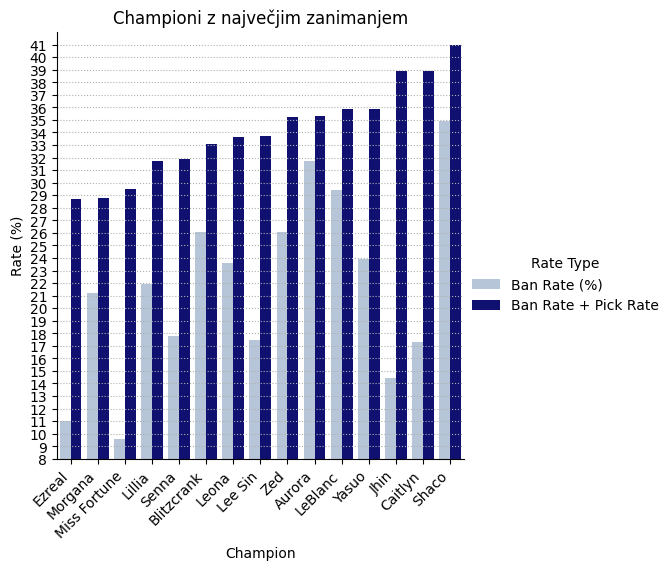

In [12]:
vsi_championi['Ban Rate + Pick Rate'] = vsi_championi['Ban Rate (%)'] + vsi_championi['Pick Rate (%)']
naj_igr_moznost = vsi_championi.nlargest(15, 'Ban Rate + Pick Rate').sort_values(by = 'Ban Rate + Pick Rate')
naj_igr_moznost_melted = naj_igr_moznost.melt(id_vars='Champion', value_vars=['Ban Rate (%)', 'Ban Rate + Pick Rate'], var_name='Rate Type', value_name='Rate (%)')

sns.catplot(x='Champion', y='Rate (%)', hue='Rate Type', data=naj_igr_moznost_melted, kind='bar', palette=['lightsteelblue', 'navy'])
plt.xticks(rotation=45, ha='right')
plt.ylim(int(naj_igr_moznost['Ban Rate (%)'].min()) - 1, naj_igr_moznost['Ban Rate + Pick Rate'].max() + 1)
plt.yticks(np.arange(int(naj_igr_moznost['Ban Rate (%)'].min()) - 1, naj_igr_moznost['Ban Rate + Pick Rate'].max() + 1, 1))
plt.grid(True, axis='y', linestyle='dotted')
plt.title('Championi z največjim zanimanjem')
plt.show()


Pri večini championov za katere je največje zanimanje prevladuje ban rate. Do tega verjetno pride, ker nekateri igralci konsistentno prepovedujejo iste champione proti katerim ne marajo igrati. Takšni pri katerih prevladuje pick rate so Ezreal, Miss Fortune, Jhin, Caitlyn, ki so vsi vloge bot, za katero smo že ugotovili, da je med manj prepovedani, če gledamo vse ranke. 

Zelo zanimiva analiza za poznavalca igre bi bila tudi, kateri championi imajo največjo razliko v win rate glede na to, kateri rank jih igra. Oglejmo si še to.

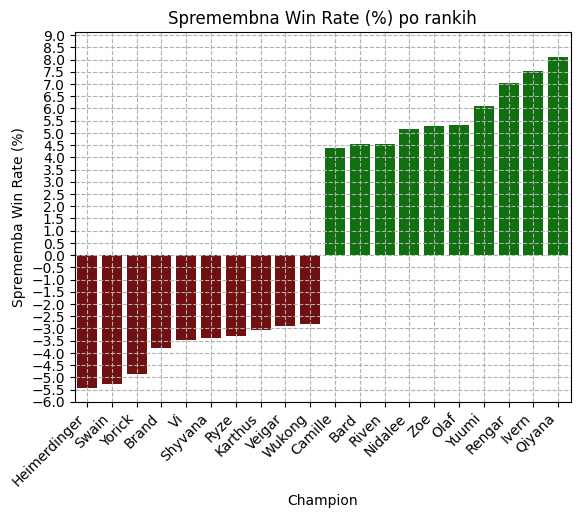

In [13]:
vsi_championi['Sprememba Win Rate (%)'] = vsi_championi_platplus['Win Rate (%)'] - vsi_championi_iron['Win Rate (%)']
dobri = vsi_championi.nlargest(10, 'Sprememba Win Rate (%)').sort_values(by = 'Sprememba Win Rate (%)')
slabi = vsi_championi.nsmallest(10, 'Sprememba Win Rate (%)').sort_values(by = 'Sprememba Win Rate (%)')
vsi_championi_wr_change = pd.concat([slabi, dobri])

sns.barplot(x='Champion', y='Sprememba Win Rate (%)', hue = 'Champion', data=vsi_championi_wr_change, palette=['maroon']*10 + ['green']*10, legend = False)
plt.xticks(rotation=45, ha='right')
plt.ylim(int(vsi_championi_wr_change['Sprememba Win Rate (%)'].min()) - 1, vsi_championi_wr_change['Sprememba Win Rate (%)'].max() + 1)
plt.yticks(np.arange(int(vsi_championi_wr_change['Sprememba Win Rate (%)'].min()) - 1, vsi_championi_wr_change['Sprememba Win Rate (%)'].max() + 1, 0.5))
plt.grid(True, linestyle='dashed')
plt.title('Spremembna Win Rate (%) po rankih')
plt.show()

Rezultati so pričakovani, a še vedno zanimivi. Največjo pozitivno razliko imajo championi pri katerih je znanje pomembnejše - Rengar, Qiyana, Riven, Ivern so splošno znani kot zahtevni. Naprotno imajo največjo negativno razliko Heimerdinger, Brand, Veigar ki so manj zahtevni in pri katerih dodatno znanje ne izboljša možnosti za zmago v tako veliki meri. Zelo nas preseneti podatek, da je Yuumi med bolj *zahtevnimi* championi, saj je znana kot lahka. 

### PERSONALIZIRANA ANALIZA

Recimo, da smo nov igralec, ki se odloča katerega championa bi igral. S pomočjo zbranih podatkov skušajmo ugotoviti, kaj je statistično gledano najboljša izbira.

Odločajmo se na podlagi naslednjih kriterij: radi bi igrali championa, katerega primarni role je top. Želimo, da imamo dobre možnosti za zmago (visok win rate) in, da je naš champion čim bolj redko prepovedan, da ga bomo sploh lahko igrali. Za začetki rank bomo izbrali iron. Naša formula za izračun najboljšega championa bo oblike: $$ \text{Win Rate} \times (1 - \text{Ban Rate} \times 2.5) $$ Do tega pridemo, ker je povprečen Win Rate 50%, Ban Rate pa približno 10%, želimo pa, da ima Ban Rate pol tolikšno težo ( $5 \div 2 = 2.5$ ), saj lahko ob prepovedi izberemo drugega.

In [14]:
import warnings
warnings.filterwarnings('ignore') #odpravimo nered
mozni_kandidati_top = vsi_championi_iron[vsi_championi_iron['Role'] == 'Top']
mozni_kandidati_top['Nas kriterij'] = round((vsi_championi_iron['Win Rate (%)'] * (100 - vsi_championi_iron['Ban Rate (%)'] * 2.5)) / 100, 1)
mozni_kandidati_sorted = mozni_kandidati_top.sort_values(by = 'Nas kriterij', ascending = False)
print('S pomočjo kriterija smo ugotovili, da so za začetnika '
      f'najboljši {mozni_kandidati_sorted.iloc[0,0]}, {mozni_kandidati_sorted.iloc[1,0]} in {mozni_kandidati_sorted.iloc[2,0]}. ' 
      'Če hočemo večjo izbiro pa lahko pogledamo tabelo 10 najboljših:')
mozni_kandidati_sorted.head(10)


S pomočjo kriterija smo ugotovili, da so za začetnika najboljši Shen, Singed in Sion. Če hočemo večjo izbiro pa lahko pogledamo tabelo 10 najboljših:


,Champion,Win Rate (%),Pick Rate (%),Ban Rate (%),Matches,Role,Nas kriterij
117,Shen,51.18,1.3,0.2,1276,Top,50.9
119,Singed,51.39,1.0,0.4,969,Top,50.9
120,Sion,51.52,1.9,1.2,1879,Top,50.0
61,Kayle,51.31,2.6,1.2,2625,Top,49.8
95,Ornn,50.55,2.1,0.6,2085,Top,49.8
129,Tahm Kench,52.45,2.8,2.2,2793,Top,49.6
22,ChoGath,52.01,3.6,1.9,3559,Top,49.5
66,Kled,49.78,0.9,0.5,898,Top,49.2
136,Trundle,51.78,3.0,2.2,2947,Top,48.9
141,Urgot,50.54,3.3,2.0,3257,Top,48.0


Ali bodo našemu nadobudnemu igralcu te championi pomagali tudi v višjih rankih? Poglejmo si še Win Rate teh championov v silverju, platinumu in diamondu.

In [15]:
vsi_championi_silver = pd.read_csv('..\podatki\csv\silver.csv')
vsi_championi_plat = pd.read_csv('..\podatki\csv\platinum.csv')
vsi_championi_diamond = pd.read_csv('..\podatki\csv\diamond.csv')
nasi_silver = vsi_championi_silver[(vsi_championi_silver['Champion'] == 'Singed') |  
                            (vsi_championi_silver['Champion'] == 'Shen') | 
                            (vsi_championi_silver['Champion'] == 'Ornn')]
nasi_plat = vsi_championi_plat[(vsi_championi_plat['Champion'] == 'Singed') |  
                            (vsi_championi_plat['Champion'] == 'Shen') | 
                            (vsi_championi_plat['Champion'] == 'Ornn')]
nasi_diamond = vsi_championi_diamond[(vsi_championi_diamond['Champion'] == 'Singed') |  
                            (vsi_championi_diamond['Champion'] == 'Shen') | 
                            (vsi_championi_diamond['Champion'] == 'Ornn')]
pd.concat([nasi_silver, nasi_plat, nasi_diamond]).head(9)


,Champion,Win Rate (%),Pick Rate (%),Ban Rate (%),Matches,Role
95,Ornn,52.26,3.0,0.6,4654,Top
117,Shen,49.69,2.0,0.3,3188,Top
119,Singed,50.17,1.1,0.3,1742,Top
95,Ornn,52.03,3.6,0.5,5241,Top
117,Shen,50.84,2.1,0.2,3025,Top
119,Singed,52.52,1.2,0.3,1748,Top
95,Ornn,51.76,4.3,0.6,2728,Top
117,Shen,51.52,2.2,0.2,1419,Top
119,Singed,50.66,1.2,0.3,758,Top


Super, naši izbrani championi imajo vsi zelo dober win rate in so kljub našemu ignoriranju majhnega ban rate-a zadostili tudi temu kriteriju. Ti trije championi so torej super izbira za nekoga, ki bi se rad začel ukvarjati z LoL-om.

## ZAKLJUČEK 

S pomočjo analize podatkov smo izvedeli veliko zanimiv stvari. Nekatere glavne, ki si zaslužijo ponovne omembe so: 
- na igralce pri izbiri prepovedi vpliva več kot zgolj zmožnost nasprotnika za zmago
- eden glavnih kriterij pri izbiri prepovedi je med drugim to, kako pogosto je champion izbran, saj je korelacija velika
- top ima največjo izbiro championov, bot pa najmanjšo
- tudi pri prepovedih je pomembno znanje, le-te se namreč močno razlikujejo po različnih rankih
- za novega igralca so najboljša izbira championov Singed, Shenn in Ornn, ki jih bodo lahko popeljali do zmage tudi v višjih rankih

Pridobljeni podatki so nam potešili začetno radovednost. Za možnost prihodne analize bi bilo zanimivo tudi pogledali, kako vsi dani podatki pridejo na plano v LoL e-sport sceni.

<div align="right">Lovro Klinc</div>